            新增死亡        新增治愈        新增确诊
统计日期                                    
1月11日   0.000000    4.000000    0.000000
1月12日   0.000000    1.000000    0.000000
1月13日   1.000000    5.000000    0.000000
1月16日   1.000000    6.000000   21.500000
1月17日   0.666667    5.333333   15.333333
...          ...         ...         ...
5月5日   27.901869  149.808411  378.163551
5月6日   30.817757  180.163551  430.892523
5月7日   26.654206  182.439252  429.121495
5月8日   24.883178  132.644860  422.892523
5月9日   20.172897  242.869159  400.962617

[137 rows x 3 columns]


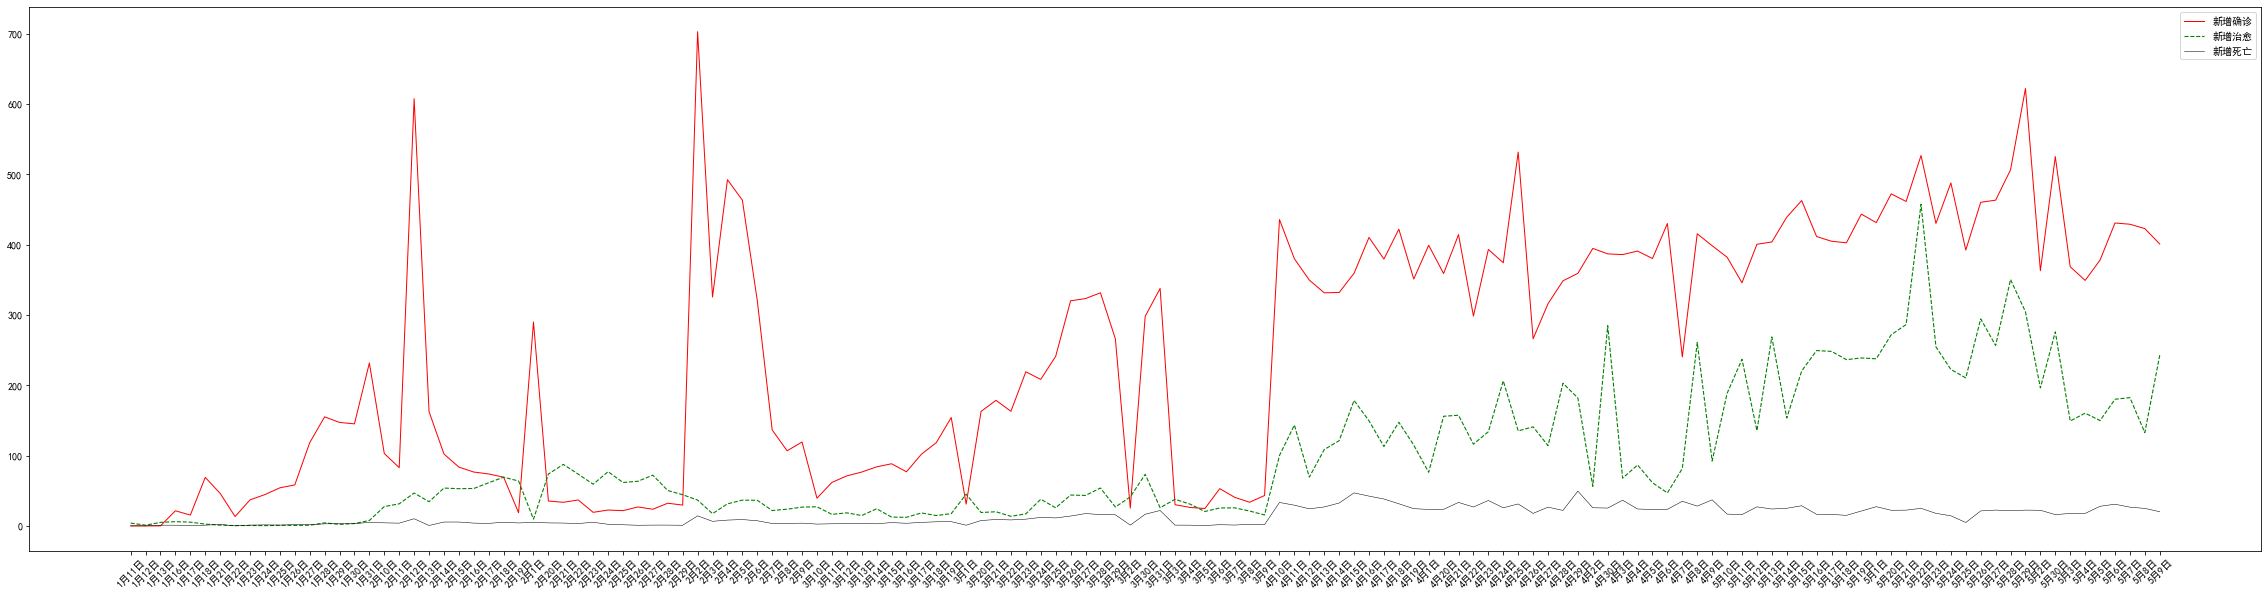

In [1]:
''''''
#%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import pylab as mpl #导入中文字体, 避免显示乱码

mpl.rcParams['font.sans-serif'] = ['SimHei'] #设置为黑体字

#需要用到read_xlsx方法中的parse_dates参数和date_parser参数
dateparse = lambda dates:pd.datetime.strptime(dates,'%m-%d')
data = pd.read_excel('C:\\Users\\dell\\Desktop\\东三省建模a\\cov数据\\test.xls')#,encoding='utf-8',
                     #parse_dates=['date'],date_parser=dateparse)

#print(data.head())
#print(data)
#数据透视表，需要对受理日期进行聚合，并对‘区局’列计数
table = pd.pivot_table(data,index=['统计日期'],values=[u'新增确诊',  u'新增治愈', u'新增死亡'])
#print(table.head(20))  #看一下table的前20行数据是否正常
#print(table.index)
print(table)

'''test'''
#生成figure对象
fig = plt.figure(figsize = (40, 10))
#fig = plt.figure()
#生成axis对象
ax = fig.add_subplot(111) #本案例的figure中只包含一个图表
#设置x轴为时间格式，这句非常重要，否则x轴显示的将是类似于‘736268’这样的转码后的数字格式
#ax.xaxis.set_major_formatter(mdate.DateFormatter('%m-%d'))

#设置x轴坐标值和标签旋转45°的显示方式
#plt.xticks(pd.date_range(table.index[0],table.index[-1],freq='M'),rotation=45)
plt.xticks(rotation=45)

#x轴为table.index，也就是‘受理日期’，y轴为数量，颜色设置为红色
ax.plot(table.index, table['新增确诊'],linewidth = 1.0, color='red', zorder = 0)
ax.plot(table.index, table['新增治愈'], color = 'green', linewidth = 1.1, linestyle = '--', zorder = 1)
ax.plot(table.index, table['新增死亡'],color = 'black', linewidth = .5, zorder = 2)
#plt.savefig(fname="pic.png",figsize=[30,10])

plt.legend(labels = ['新增确诊', '新增治愈', '新增死亡']) 
plt.show()

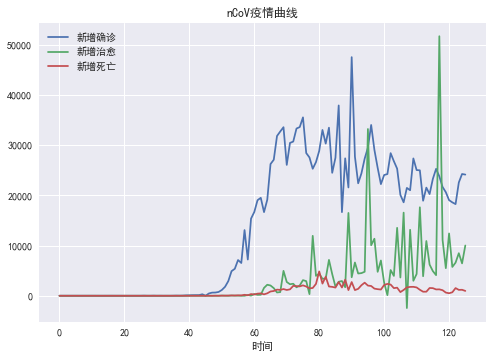

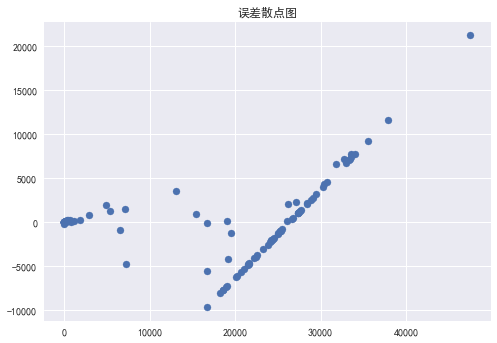

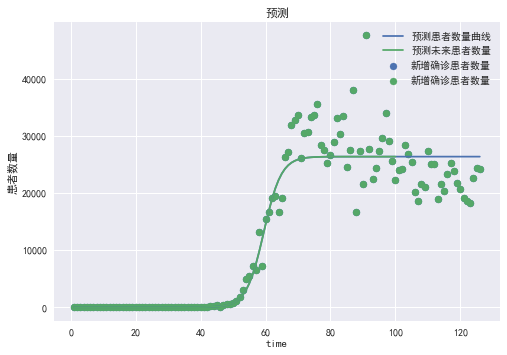

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
# from scipy.optimize import curve_fit  # 非线性最小二乘法拟合
from scipy.optimize  import leastsq
 
warnings.filterwarnings('ignore')
 
plt.style.use("seaborn")
plt.rc('font', family='SimHei', size=13)  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
 
 
# 先读取数据
#China_data = pd.read_excel(r"C:\\Users\\dell\\Desktop\\东三省建模a\\cov数据\a~h\\巴基斯坦.xls", encoding='gbk')
China_data = pd.read_excel(r"C:\\Users\\dell\\Desktop\\东三省建模a\\cov数据\j-p\\美国.xls", encoding='gbk')

China_data

#'''''''''''''
plt.plot(China_data['新增确诊'], label='新增确诊')
plt.plot(China_data['新增治愈'], label='新增治愈')
plt.plot(China_data['新增死亡'], label='新增死亡')
#plt.plot(China_data['累计治愈'], label='治愈')
plt.legend(loc="best")
plt.xlabel("时间")
plt.title("nCoV疫情曲线")

####
plt.figure()
# 逻辑斯蒂增长模型
def logistic_increase_function(p, t):
    K, a, b = p
    exp_value = np.exp(-a * (t - b))
    return K / (1 + exp_value)

# 定义预测误差函数
def err_f(p, t, y):
    return logistic_increase_function(p, t) - y
# 参数初始值
logistic_p0 = [80000, 0.8, 20]  # 初始值只要不是太离谱，最终都会收敛
 
# 我们选择的数据
t = np.array([i + 1 for i in range(126)])
China_y = China_data['新增确诊'].values
 
# 利用最小二乘法求解参数
logistic_params = leastsq(err_f, logistic_p0, args=(t, China_y))
 
China_p = logistic_params[0]
 
# 利用我们定义的逻辑斯蒂增长函数预测
China_predict_data = logistic_increase_function(China_p, t)
China_predict_data
 
# 预测的误差
China_e = China_y - China_predict_data
China_e
 
# 绘制误差的散点图
plt.scatter(China_y, China_e)
plt.title("误差散点图")

########################################
plt.figure()
# 绘图
plt.scatter(t, China_y, label="新增确诊患者数量")
plt.plot(t, China_predict_data, label='预测患者数量曲线')
plt.xlabel('time')
plt.ylabel('患者数量')
plt.legend(loc='best') 

# 预测中国疫情未来走势
future_t = [i + 1 for i in range(0, 100)]
China_future_fit = logistic_increase_function(China_p, future_t)
China_future_fit

# 绘图
plt.scatter(t, China_y, label="新增确诊患者数量")
plt.plot(future_t, China_future_fit, label="预测未来患者数量")
plt.xlabel('time')
plt.ylabel('患者数量')
plt.legend(loc='best') 
plt.title('预测')

# Gompertz增长模型
def func(p, t):
    k, a, b = p
    return k * a**(b**t)